<a href="https://colab.research.google.com/github/YKochura/ai-lab/blob/main/lab3/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Логістична регресія** &mdash; статистичний регресійний метод, який застосовують для задач бінарної класифікації, тобто, коли модель має віднести вихідне значення (прогноз) до однієї з двох категорій: `0` або `1`. 

Наприклад, ми можемо за допомогою логістичної регресії передбачити результат складання студентом / студенткою екзамену з цього предмету `{здасть (1) / не здасть (0)}`, використовуючи інформацію про те, скільки часу було витрачено студентом / студенткою на проєкт, скільки лекцій відвідано, скільки практичних здано на оцінку > 7 балів, тощо. Або ж ми можемо за допомогою логістичної моделі класифікувати зображення на дві категорії, наприклад, `кіт (1)` або `собака (0)`.
 

# Модель логістичної регресії

Логістичну регресію можна розглядати як одношарову нейронну мережу, яка складається з одного нелінійного нейрона.

![](https://docs.google.com/uc?export=download&id=1Abx7cOwNEV0CcFHRVo4XqKMfhgBZeUdS)

Метод логістичної регресії заснований на лiнiйнiй регресiї, оскільки використовується однаковий підхід: знаходження лінійної комбінації вхідних ознак (зважена сума) з урахуванням зміщення. Основна віднність між цими методами полягає у тому, що у логістичній регресії до зваженої суми вхідних ознак та зміщення, що фактично є вихідним значенням лінійної регресії, застосовується сигмоїдна функцiя активації, яка перетворює вихiд лiнiйної моделі у вихід логістичної регресії. Іншими словами, вихід (прогноз) логістичної регресії представляє собою дійсне значення, яке лежить у діапазоні вiд 0 до 1 ($\hat y \in [0, 1]$). Це значення можна iнтерпретувати як ймовiрнiсть приналежності вхідних даних до певного класу (0 або 1): 

$$p(y = 1 | z) = \hat y = \sigma(z) = g(z) = \frac{1}{1 + \exp{(-z)}} $$

У випадку, коли нейрон є лінійним, тобто, коли відсутня нелінійна функція активації, тоді на виході отримуємо $\hat y = z$, що є просто вихідним значення лінійної регресії. 

## Функції активації
Нижче подано деякі загальновживані функції активації (усі нелінійні), які часто використовуються у нейронних мережах.

![](https://docs.google.com/uc?export=download&id=1jNGnPUyKH7SoQton8bWAHhmKHkuLtLr4)

За характером навчальних даних, метод логістичної регресії відносить до контрольованого навчання (навчання з учителем). Тобто, для кожного прикладу з навчального набору даних заздалегідь підготовлена мітка (label), яка показує приналежніть цих прикладів певного класу.

**Дано:**

- Навчальний набір: $\{(\boldsymbol{X}^{(1)}, y^{(1)}), (\boldsymbol{X}^{(2)}, y^{(2)}),..., (\boldsymbol{X}^{(n)}, y^{(n)})\}$

  - де $\boldsymbol{X}^{(i)}$ &mdash;  $i$-й навчальний приклад. Є $m$-вимірним вектором-стовпцем $\boldsymbol{X}^{(i)} = (x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_m)$
  - $n$ &mdash; загальна кількість навчальних прикладів
  - $y^{(i)}$ &mdash; підготовлена мітка для $i$-го навчального прикладу (бінарна змінна), $y^{(i)} \in \{0,1\}$

Модель логістичної регресії можна інтерпретувати як дуже просту нейронну мережу, яка: 

- має вектор-рядок дійсних значень ваг $\boldsymbol{W} = \begin{bmatrix}
w_1 & w_2 & \cdots & w_m
\end{bmatrix}$
- має дійсне значення зміщення $b$
- використовує сигмоїду в якості активаційної функції

# Навчання

Ми можемо навчити модель, використовуючи градієнтний спуск. Фактично, **градієнтний спуск** або будь-який інший алгоритм оптимізації дозволяє знайти глобальний мінімум цільової функції (усередненої функції втрат на всьому навчальному наборі), якщо підбрано оптимальну швидкість навчання та виконано достатню кількість ітерацій навчання. 

Навчання моделі логістичної регресії має різні етапи. На початку (крок 0) ініціалізуються параметри моделі. Інші кроки повторюються протягом певної кількості епох (навчальних ітерацій). 

**Крок 0:** Ініціалізувати ваги та зсув (наприклад, випадковими значеннями з нормального розподілу)

**Крок 1:** Обчислити лінійну комбінацію вхідних ознак та ваг, включаючи зсув.  Це можна зробити за один крок для всіх навчальних прикладів, використовуючи [векторизацію (vectorization)](https://www.geeksforgeeks.org/vectorization-in-python/) та  [трансляцію (broadcasting)](https://www.geeksforgeeks.org/python-broadcasting-with-numpy-arrays/)

$$z = W \cdot X + b$$

де $\cdot$ скалярний добуток (поелементний добуток), $W$ &mdash;  вектор-рядок ваг з формою $(1, m)$, $X$ &mdash; матриця форми $(m, n)$.

**Крок 2:** Застосувати нелінійну функцію активації (сигмоїду), яка поверне дійсне значення у проміжку між 0 та 1:

$$\hat y  = \frac{1}{1 + \exp(-z)}$$

**Крок 3:** Обчислити усереднену втрату на всьому навчальному наборі даних. Функцію, яка визначає усереднені втрати на всьому навчальному наборі даних, часто називають цільовою функцією або імпіричним ризиком. Основна задача оптимізаційного алгоритму &mdash;  мінімізувати у процесі навчання цільову функцію на стільки, на скільки це можливо, не втрачаючи при цьому здатності моделі узагальнювати на нових даних. Для задач бінарної класифікації використовують бінарну перехресну втрату ентропії:

$$\mathcal{J}(\hat y,y)  = - \frac{1}{n} \sum_{i=1}^n \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]$$

**Крок 4:** Розрахувати градієнти цільвої функції відносно ваг та зсуву:

$$\boxed{\begin{aligned}
\frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} &= \frac{1}{n} \big [-\frac{y}{\hat y} + \frac{1- y}{1 - \hat y} \big ] \\[12pt]
\frac{\partial \mathcal{J}(\hat y, y)}{\partial z} &= \frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial z} = \frac{1}{n} (\hat y - y)  \\[12pt]
\frac{\partial \mathcal{J}(\hat y, y)}{\partial W} &= \frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial z} \frac{\partial z}{\partial W} = \frac{1}{n} X^\intercal \cdot (\hat y - y) \\[12pt]
\frac{\partial \mathcal{J}(\hat y, y)}{\partial b} &=  \frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial z} \frac{\partial z}{\partial b} = \frac{1}{n} (\hat y - y)
\end{aligned}}$$

**Крок 5:** Оновити ваги та зсув:

$$\boxed{\begin{aligned}
W &= W - \alpha \frac{\partial \mathcal{L}(\hat y, y)}{\partial W} \\[12pt]
b &= b - \alpha \frac{\partial \mathcal{L}(\hat y, y)}{\partial b}
\end{aligned}}$$

де $\alpha$ &mdash; швидкість навчання (крок навчання).

# Імпортупвання бібліотек

In [1]:
import numpy as np # numerical python library for calculus
import copy
from PIL import Image # image processing in python with Pillow
import requests # library for obtaining the requested data from the specific server
from matplotlib import pyplot as plt # library for creating static, animated, and interactive visualizations in Python
np.random.seed(1) # makes the random numbers predictable

## Зчитуєм зображення та перетворюємо його у NumPy масив 

In [2]:
image = Image.open(requests.get("https://docs.google.com/uc?export=download&id=1DGw_ekhE5uvyw8eq4UR6lEOlUqmM9bx6", stream=True).raw)
image_array = np.array(image)

## Переглядаємо зображення

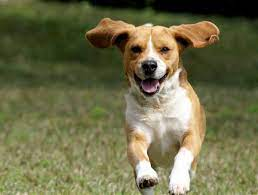

In [3]:
image

## Перевіряємо форму NumPy масуву для нашого зображення

Зображення є кольоровим, тому маємо тривимірний масив: (висота, ширина, RGB)

In [4]:
image_array.shape

(195, 258, 3)

# Конвертуємо зображення в чорно-біле 

Це дозволить зменшити у три рази кількість вхідних ознак, які будуть використовуватись для навчання логістичної регресії

In [5]:
image_gray = image.convert('L')

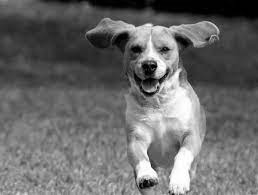

In [6]:
image_gray

## Перетворюємо чорно-біле зображення у NumPy масив

In [7]:
image_gray_array = np.array(image_gray)

## Виводимо NumPy масив чорно-білого зображення та перевіряємо його форму

In [8]:
image_gray_array

array([[129, 132, 135, ...,   1,   1,   1],
       [118, 120, 124, ...,   1,   1,   1],
       [110, 112, 116, ...,   1,   1,   1],
       ...,
       [158, 141, 159, ..., 120, 122, 150],
       [168, 150, 165, ..., 116, 126, 154],
       [179, 160, 171, ..., 140, 147, 175]], dtype=uint8)

In [9]:
image_gray_array.shape

(195, 258)

## Змінюємо форму NumPy масиву чорно-білого зображення

Маємо на вхід логістичній регресії подати вектор-стовпець ознак з формою (m, 1), де $m = \text{висота зображення} * \text{ширина зображення}$. У нашому випадку цими ознаками є кожен піксель чорно-білого зображення.


In [10]:
im_reshaped = np.reshape(image_gray_array, (image_gray_array.shape[0] * image_gray_array.shape[1], 1))

In [11]:
im_reshaped.shape

(50310, 1)

In [12]:
im_reshaped

array([[129],
       [132],
       [135],
       ...,
       [140],
       [147],
       [175]], dtype=uint8)

### Якщо необхідно, ми можемо переглянути зображення з NumPy масиву

In [13]:
im = Image.fromarray(image_gray_array)

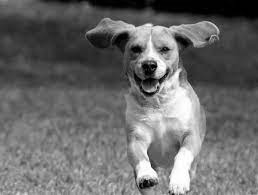

In [14]:
im

## Нормалізація пікселів зображення

Основна мета нормалізації &mdash; зробити обчислення більш ефективними, шляхом масштабування значень пікселів зображення, які будуть лежати у діапазоні від 0 до 1. 

Знайдемо максимальне значення пікселя у нашому масиві

In [15]:
im_reshaped.max()

255

Поділими кожне значення пікселя у масиві на максимальне значення

In [16]:
norm = im_reshaped / 255.0

In [17]:
norm

array([[0.50588235],
       [0.51764706],
       [0.52941176],
       ...,
       [0.54901961],
       [0.57647059],
       [0.68627451]])

---
# Завдання

Розглянемо задачу бінарної класифікації зображень: кіт (1) або собака (0). Оскільки на нашому зображенні, яке ми будемо використовувати у якості навчального прикладу для логістичної регресії знаходиться собака, створимо відповідну мітку:

In [18]:
y_true = np.array([[0]])

In [19]:
y_true.shape

(1, 1)

### Крок 0: Ініціалізувати ваги та зсув

In [20]:
# TODO
def parameters_inititalization():
  """
  Ця функція ініціалізує вектор-рядок випадкових дійсних значень ваг форми (1, 50310), отриманих з нормального розподілу та зсув (довільне дійсне значення)

  Повертає:
  W -- вектор-рядок ваг форми (1, 50310)
  b -- зсув (скаляр)
  """

  # BEGIN_YOUR_CODE
  arr = np.random.standard_normal(size=(1,50310))
  return arr,3.0;
  # END_YOUR_CODE

In [21]:
resArr = []

In [22]:
W, b = parameters_inititalization()

In [23]:
W

array([[ 1.62434536, -0.61175641, -0.52817175, ..., -0.02584146,
        -0.15878997, -1.27685482]])

In [24]:
W.shape

(1, 50310)

In [25]:
b

3.0

## Крок 1 та 2

### Крок 1: Обчислити лінійну комбінацію вхідних ознак та ваг, включаючи зсув

### Крок 2: Застосувати нелінійну функцію активації (сигмоїду) до отриманого значення з крок 1

In [60]:
# TODO
def forwardPropagate(X, W, b):
  """
  Ця функція обчислює лінійну комбінацію вхідних ознак та ваг, включаючи зсув і знаходить активаційне значення сигмоїди

  Параметри:
  X -- вхідний вектор стовпець (у нашому випадку - це чорнобіле зображення собаки) форми (50310, 1)
  W -- вектор-рядок ваг моделі форми (1, 50310)
  b -- зсув моделі (скаляр)

  Повертає:
  z -- загальна зважена сума вхідних ознак, включаючи зсув
  y_hat -- активаційне значення сигмоїди
  """
  
  # BEGIN_YOUR_CODE
  z = np.dot(W,X) + b
  y_hat = (1.0 /(1.0 + np.exp(-z)))
  return z,y_hat

  # END_YOUR_CODE

In [61]:
z, y_hat = forwardPropagate(norm, W, b)

In [62]:
z

array([[-25.18338327]])

In [63]:
y_hat

array([[1.15610055e-11]])

### Крок 3: Обчислити усереднену втрату на всьому навчальному наборі даних. Цільова функція

У нашому випадку ми розглядаємо пряме та зворотне поширення для одного навчального прикладу (зображення).

In [64]:
# TODO
def cost(n, y_hat, y_true):
  """
  Ця функція обчислює усереднену втрату для задачі бінарної класифікації на всьому навчальному наборі даних

  Параметри:
  n -- загальна кількість навчальних прикладів (у нашому випадку - це  одне чорнобіле зображення собаки)
  y_hat -- активаційне значення сигмоїди (прогноз логістичної регресії)
  y_true -- істинний клас зображення (очікувана мітка прогнозу)

  Повертає:
  J --  усереднена втрата моделі для задачі бінарної класифікації на всьому навчальному наборі даних
  """

  # BEGIN_YOUR_CODE  
  epsilon = 1e-5 
  return -(y_true*np.log(y_hat+epsilon)+(1.0-y_true)*np.log(1.0-y_hat+epsilon))
  # END_YOUR_CODE

In [65]:
J = cost(1, y_hat, y_true)
J

array([[-9.99993844e-06]])

### Крок 4: Розрахувати градієнти цільвої функції відносно ваг та зсуву

In [66]:
# TODO
def backwardPropagate(n, X, y_hat, y_true):
  """
  Ця функція обчислює градієнти цільвої функції відносно ваг та зсуву

  Параметри:
  n -- загальна кількість навчальних прикладів (у нашому випадку - це  одне чорнобіле зображення собаки)
  X -- вхідний вектор стовпець (у нашому випадку - це чорнобіле зображення собаки) форми (50310, 1)
  y_hat -- активаційне значення сигмоїди (прогноз логістичної регресії)
  y_true -- істинний клас зображення (очікувана мітка прогнозу)

  Повертає:
  dW --  градієнт цільової функції відносно ваг моделі
  db -- градієнт цільової функції відносно зсуву моделі
  """

  # BEGIN_YOUR_CODE
  dW = np.transpose(X) * (y_hat - y_true)
  db = (y_hat - y_true)
  return dW,db
  # END_YOUR_CODE

In [67]:
dW, db = backwardPropagate(1, norm, y_hat, y_true)

In [68]:
dW.shape

(1, 50310)

In [69]:
db

array([[1.15610055e-11]])

In [70]:
db.shape

(1, 1)

### Крок 5: Оновити ваги та зсув

In [71]:
# TODO
def update(alpha, dW, db, W, b):
  """
  Ця функція оновлює навчальні параметри моделі (ваги та зсув ) у напрямку мінімізації цільової функції

  Параметри:
  alpha -- швидкість  навчання (крок навчання)
  dW --  градієнт цільової функції відносно ваг моделі
  db -- градієнт цільової функції відносно зсуву моделі
  W -- вектор-рядок ваг моделі форми (1, 50310)
  b -- зсув моделі (скаляр)

  Повертає:
  W -- оновлений вектор-рядок ваг моделі форми (1, 50310)
  b -- оновлений зсув моделі (скаляр)
  """


  # BEGIN_YOUR_CODE
  W -= alpha * dW
  b -= alpha * db
  return W, b
  # END_YOUR_CODE

In [72]:
W, b = update(0.003, dW, db, W, b)

In [73]:
W

array([[ 1.62282835, -0.61330871, -0.52975933, ..., -0.02748784,
        -0.16051866, -1.27891279]])

In [74]:
b

array([[2.99700125]])



1.   Повторіть кроки 1-5 та з'ясуйте як зміниться цільова функція, ваги та зсув нашої моделі. Швидкість навчання використовуйте alpha = 0.0001
2.   Повторіть кроки 0-5 для більшої швидкості навчання alpha = 0.003. Порівняйте отримані результати для alpha = 0.0001



In [75]:
resArr.append(copy.copy(b))

In [76]:
resArr

[array([[2.99700125]]), array([[2.99700125]]), array([[2.99700125]])]